<a href="https://colab.research.google.com/github/cjayjonathan/Hamoye_Stage_B_Tag_Along/blob/main/ML_Regression_Predicting_Energy_Efficiency_of_Buildings_Hamoye_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple linear regression model estimates the relationship between two quantitative variables where one is referred to as the independent variable and the other the dependent variable. The independent variable (X) is used to predict and also called the predictor while the predicted variable is referred to as the response variable (Y) (e.g. finding the relationship between the amount of CO2 gas emitted and the number of trees cut down). The value of Y can be obtained from X by finding the line of best fit (regression line) with minimum error for the data points on a scatter plot for both variables.

>





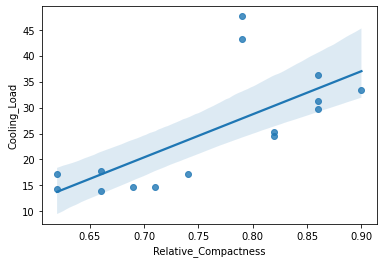

In [1]:
#This code block imports all the necessary libraries you need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This line uses the read_excel() method in pandas to fetch the ENB2012_data.xlsx file for UCI archive
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

# Defining the python dictionary
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

# Renaming the columns with the .rename method in pandas
df = df.rename(columns=column_names)

# This line selects 15 samples of one independent and one dependent variable
simple_linear_reg_df = df[["Relative_Compactness", 'Cooling_Load']].sample(15, random_state=2)

# Regression plot using seaborn (a visualization library)
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

**Multiple Linear Regression**

Unlike simple linear regression, multiple linear regression establishes the relationship between the response variable and the predictors (usually two or more). In reality, several factors contribute to a certain outcome as opposed to just one as suggested by simple linear regression. Multiple linear regression has similar assumptions as simple linear regression and also assumes that there is no significant correlation between the predictors. While the relationship between variables can be linear, it allows for non-linear relationships that are not straight lines.



Collinearity
Correlation is a measure used to describe the linear relationship between two variables. Correlation values range from -1 for a perfect negative correlation (an increase in one variable causes a decrease in the other variable) to +1 for a perfect positive correlation (both variables increase or decrease together). A correlation value of 0 indicates that there is absolutely no correlation between both variables. A situation where two or more of the predictors have a strong correlation is known as multicollinearity. Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables cannot independently contribute to predicting the value of the response variable. In addition, not all the predictors included are relevant in obtaining better results from the model. Adding more independent variables to the model is not always better instead, it might only make the model more complicated. To resolve this, one of the correlated predictors is selected and the other removed from the data.

Polynomial Regression
A polynomial regression model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable. It can be represented as-

Y = Theta Zero + Theta One X + Theta Two X Squared + ..... + Theta n X to the power n + E

for a single independent variable where n is the degree of the polynomial and Y is a linear function of 𝜃.  Depending on the task and data, there might be multiple predictors in a polynomial regression model which results in more interactions in the model. As expected, the complexity in the model increases as the degree increases.

Coefficients of multiple linear regression
General notations

**Measuring Regression Performance**

**Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE etc)**

How well a regression model performs can be obtained by how close the predicted value is to the ground truth. It is very important to use the appropriate metric to evaluate the performance. In this section, we discuss some examples of metrics used in evaluating regression models such as RSS, R-Squared, RMSE and MAE.

**Mean Absolute Error (MAE)**

MAE  is easy and intuitive such that it calculates the sum of the  average of the absolute error between the predicted values and the true values. Since the absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information about the model overshooting or undershooting. The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers.

In [2]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#Now, we split our dataset into the training and testing dataset. Recall that we
# had earlier segmented the features and target variables.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

linear_model = LinearRegression()

#Fit the model to the training dataset

linear_model.fit(x_train, y_train)

#Obtain predictions

predicted_values = linear_model.predict(x_test)

#MAE

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

#prints 0.063

0.063

**Residual Sum of Squares (RSS)**



Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.

In [3]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 



1.823

In [4]:
# Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 


0.089

**R-Squared **

Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true.

In [5]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

**Model complexity, Underfitting and Overfitting**

Model complexity refers to the number of input features used to train a model and the algorithmic learning complexity. An overly complex model can be difficult to interpret, prone to overfitting and also require more computing. When creating models, it is imperative for the model to generalise well enough to make reasonable predictions on new and unseen data. An overfit model will perform well on the training data and poorly on unseen data. While a model is required to learn the actual relationship of the variables in the training set, an overfit model memorises the training set, fits the noise, outliers and irrelevant information, then makes predictions based on this noise which is incorrect. On the other hand, when a model is too simple, it can be as a result of having very few features not sufficient enough to learn details and relationships in the data.  In a later section, we will discuss methods that can be used to achieve optimal and acceptable model complexities while avoiding overfitting and underfitting. 

**The Bias-Variance Tradeoff**

Bias and variance are common occurrences in machine learning and there is a constant struggle to achieve low bias and variance. Bias is a measure of correctness of a model i.e. how far off is a model from being correct? While high bias results in an increase in the error by making assumptions which prevent the model from capturing relevant relationships between the predictors and response variable, low bias gives lower error and also prevents underfitting by capturing important relationships. On the other hand, variance tells how much the values estimated by a model will vary across different training data. When the variance is low, it means that there is only a small change in the estimate of the model with  new training  data. A high variance causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt patterns from one training data such that it cannot generalise to other training sets. While it is essential to obtain low bias and low variance, it is almost impossible to achieve this simultaneously which is where the ‘bias-variance tradeoff’ occurs.

**Penalization Methods**

Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model. Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as Ridge and Lasso regression.

**Ridge Regression**

Also known as L2 Regularisation, this is a technique that uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them. The shrinkage prevents overfitting caused by the complexity of the model or  collinearity. It includes the square magnitude of the coefficients to the loss function as the penalty term.  If the error is defined as the square of residual, when a L2 regularization term is added, the  result is the equation below.



In [6]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

**Feature Selection and Lasso Regression**

Some datasets can be high dimensional with a very high number of features and some of them not contributing towards predicting the response variable. As a result, it becomes more computationally expensive to train a model and can also introduce noise causing the model to perform poorly. The process of selecting significant features that contribute the most in obtaining high performing models is known as feature selection. Lasso regression (Least Absolute Shrinkage and Selection Operator) reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors. By using L1 regularisation, it includes the absolute value of the magnitude to the loss function. The application of L1 regularisation (Lasso regression)  results in simpler and sparse models that allow for better interpretation. Although lasso regression helps prevent overfitting, one major limitation is that it does not consider other factors when eliminating predictors. For example, it arbitrarily  eliminates a variable from a correlated pair which might not be a good rational from a human perspective. 

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)



Lasso(alpha=0.001)

In [30]:
# Comparing the effects of regularisation

def get_weights_df(model, feat, col_name):

  # This function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [33]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')


final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights


,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000


In [34]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000


**Elastic Net Regression**

This is simply a combination of the L1 and L2 penalties from ridge and lasso regression. This method arose from the need to overcome the limitations of lasso regression. It regularizes and performs feature selection simultaneously by initially finding the optimal values of the coefficients as in ridge then performs a shrinkage.

**Non-Linear Regression Methods and Other Recommendations**



**Model Tuning and choosing parameters**

Machine learning models are parameterized such that there has to be a search for the combination of parameters that will result in the optimal performance of the model. The parameters that define the model architecture are referred to as hyperparameters while the process of exploring a range of values is called hyperparameter tuning. It is important to note the distinction between model parameters and hyperparameters. Unlike hyperparameters, model parameters are learnt during the training phase while setting hyperparameters is exclusive of the training process. Ideally, when hyperparameter tuning is completed, the result is the best parameters for the model. Grid search and random search are two common strategies for tuning hyperparameters. 

**Grid Search**

Grid search explores the combination of a grid of parameters such that for every combination of parameters, a model is built and evaluated then the model with the best result selected and its corresponding parameters. While it is computationally expensive, setting up a grid search is quite easy.



**Random Search**

As opposed to grid search, random search randomly combines parameter values in the grid to build and evaluate models. It does not sequentially combine all parameters as in grid search instead, it allows for a quick exploration of the entire action space to reach optimal values.



**Data splitting, resampling and cross validation strategy**

Data splitting in data science involves setting aside a portion of the dataset for testing (out of sample or hold-out) and evaluating the performance of the model to provide unbiased results while the rest is used in fitting the model. The proportion of division is solely based on choice and sometimes, the size of the dataset. However a common practice is to split the dataset into training, validation or dev and testing sets where the validation set is used to tune the hyperparameters to select the best values for the model. Resampling involves repeatedly selecting samples from the original dataset and using these samples to obtain more information about the model. This can create different samples of the training set and another for evaluation. Cross validation is a method used to generalise and prevent overfitting in machine learning